In [94]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats
import seaborn as sns
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
orig_data = pd.read_csv('saratoga-house-prices.csv')
orig_data.head(5)

,Price,Size,Baths,Bedrooms,Fireplace,Acres,Age
0,142.212,1.982,1.0,3,0,2.00,133
1,134.865,1.676,1.5,3,1,0.38,14
2,118.007,1.694,2.0,3,1,0.96,15
3,138.297,1.800,1.0,2,1,0.48,49
4,129.470,2.088,1.0,3,1,1.84,29


In this dataset, we have prices of houses (in dollars per sq. ft) made available along with the some properties of the house like area, number of bedrooms, age of house, etc. The goal is to create a model for the price as a function of those properties.

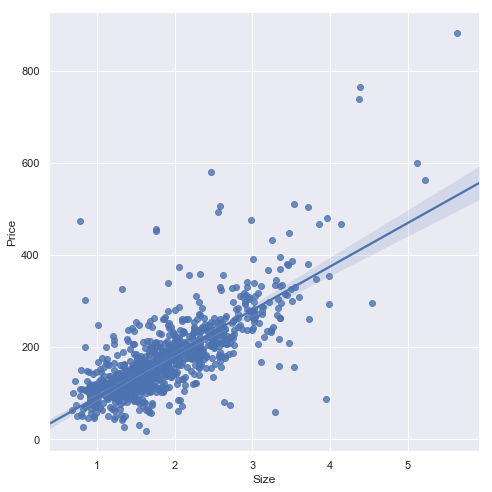

In [93]:
sns.set(color_codes=True)
filtered_df = orig_data
sns.lmplot(x="Size", y="Price", height=7, data=filtered_df);

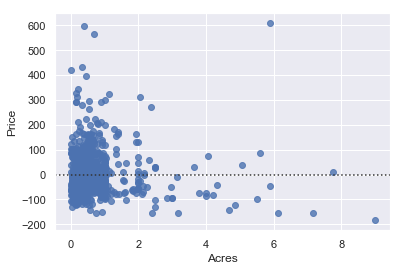

In [79]:
sns.residplot(x="Acres", y="Price", data=filtered_df);

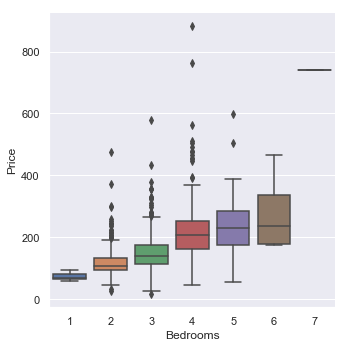

In [21]:
sns.catplot(x="Bedrooms", y="Price", kind="box", data=filtered_df);

In [65]:
x = filtered_df["Age"]
y = filtered_df["Price"]
np.corrcoef(x, y)[0][1]

-0.26140969022619415

In [72]:
X = orig_data[["Size", "Baths", "Bedrooms", "Fireplace", "Age"]].values
Y = orig_data.iloc[:,0].values
print(X.shape)
print(Y.shape)

(1063, 5)
(1063,)


In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50)
print (X_train.shape, X_test.shape)

(531, 5) (532, 5)


In [83]:
def get_prediction(degree):
    model = Pipeline([('poly', PolynomialFeatures(degree=degree, interaction_only=True)),
                      ('linear', LinearRegression(fit_intercept=False))])
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    return Y_train_pred, Y_test_pred

In [84]:
Y_train_pred, Y_test_pred = get_prediction(degree=1)
training_rmse = math.sqrt(mean_squared_error(Y_train_pred, Y_train))
test_rmse = math.sqrt(mean_squared_error(Y_test_pred, Y_test))
training_rsq = r2_score(Y_train_pred, Y_train)
test_rsq = r2_score(Y_test_pred, Y_test)
print (training_rmse, test_rmse, training_rsq, test_rsq)

50.101161136421894 54.75122290065608 0.46482251291139953 0.399293032497935


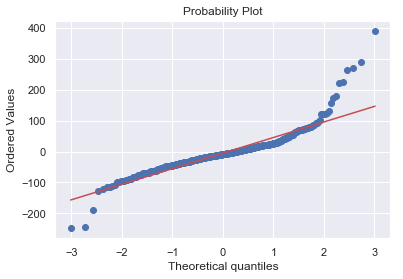

In [92]:
# Q-Q Plot
training_residuals = Y_test - Y_test_pred
stats.probplot(training_residuals, dist="norm", plot=pylab)
pylab.show()

The above Q-Q plot implies that there are outliers in the data, both in the negative side (y_actual is much less than y_pred) and on the positive side (y_actual is much higher than y_pred).